In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('./Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
x = dataset.iloc[:, 2:]

In [7]:
# Using the elbo method to find the optimal number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

c:\Users\rushi\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rushi\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rushi\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rushi\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

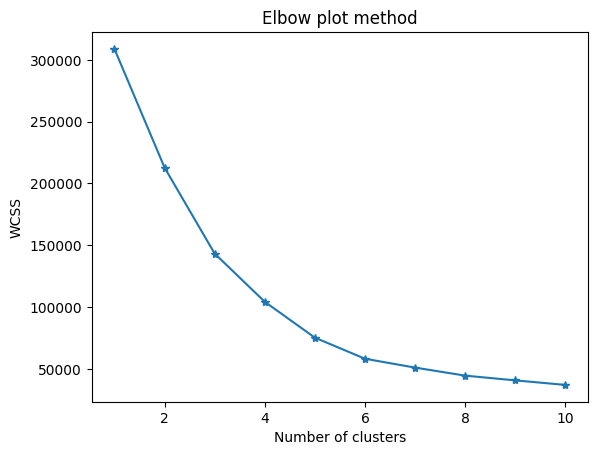

In [9]:
plt.plot(range(1,11), wcss, '-*')
plt.title('Elbow plot method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# Fitting the kmeans to the dataset

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

c:\Users\rushi\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


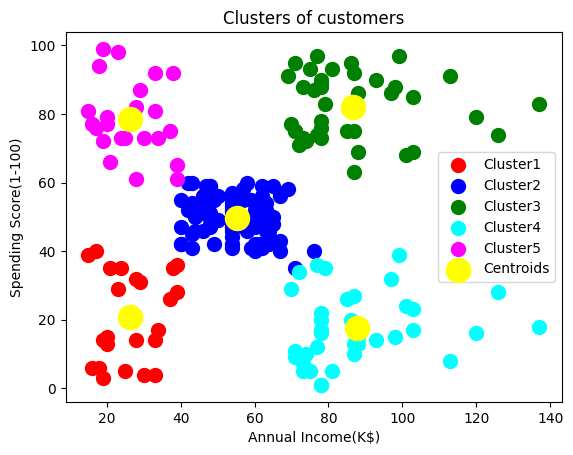

In [35]:
plt.scatter(x.iloc[y_kmeans==0,1],x.iloc[y_kmeans==0,2],s=100,c='red',label='Cluster1')
plt.scatter(x.iloc[y_kmeans==1,1],x.iloc[y_kmeans==1,2],s=100,c='blue',label='Cluster2')
plt.scatter(x.iloc[y_kmeans==2,1],x.iloc[y_kmeans==2,2],s=100,c='green',label='Cluster3')
plt.scatter(x.iloc[y_kmeans==3,1],x.iloc[y_kmeans==3,2],s=100,c='cyan',label='Cluster4')
plt.scatter(x.iloc[y_kmeans==4,1],x.iloc[y_kmeans==4,2],s=100,c='magenta',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],s=300,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()